<a href="https://colab.research.google.com/github/Hangelinika/Hangelinika/blob/main/Hana_Optimizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all that we will need

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Read data from Excel
df = pd.read_excel("CASE STUDY - data.xlsx")

In [ ]:
# Look at the data
df.head()

,CODE_ZIP,AMT_NET_INCOME,AMT_REQUESTED_TICKET,TEXT_BANK,NUM_AGE,TEXT_GENDER,NFLAG_MOBILEDEVICE,CODE_IP_1,NUM_LEVEN_EMAIL,NFLAG_EMAIL_NUMERAL,CNT_REJECTED,NUM_DAYS_CREDIT_HISTORY,TARGET
0,18100,22000,8000,"Česká spořitelna, a.s.",37,Muž,0,178,40,0,1,450,0
1,79501,28000,10000,"Komerční banka, a.s.",58,Muž,0,85,88,0,1,7100,0
2,69661,10800,1000,"Československá obchodní banka, a.s.",32,Muž,1,131,16,0,1,750,0
3,43111,10000,6000,"Československá obchodní banka, a.s.",24,Žena,1,78,50,1,1,0,0
4,74201,32000,8000,"Česká spořitelna, a.s.",34,Muž,1,109,92,0,1,1950,0


In [ ]:
# Define X and Y if needed
X = df[['CODE_IP_1','AMT_NET_INCOME','AMT_REQUESTED_TICKET','TEXT_BANK','NUM_AGE', 'TEXT_GENDER','CNT_REJECTED','NUM_DAYS_CREDIT_HISTORY']]
Y = df['TARGET']


# **Otázky**
Zkoumání a popis datového vzorku:
***1. Jaký je nejvyšší věk žadatele?***
 Odpoveď: 84 let



In [ ]:
max_age = df['NUM_AGE'].max()
print(max_age)

84


***2. Jaký je modus věku žadatele?*** Odpoveď: 20 let.

In [ ]:
mode_age = df['NUM_AGE'].mode()
print(mode_age)


0    20
Name: NUM_AGE, dtype: int64


***3. Jaký je průměrný příjem žadatele a jak se liší od průměru v ČR?***
Odpověď: Průměrný příjem žadatele je 27 042 Kc, což jsou asi tři čtvrtiny průměrné čisté mzdy v ČR v prvním čtvrtletí 2025.


In [ ]:
average_income = df['AMT_NET_INCOME'].mean()
print(average_income)


27041.529


4.6.2025 Q1
from https://csu.gov.cz/employees-and-wages?pocet=10&start=0&1_pocet=10&1_start=0&skupiny=11&vlastnostiVystupu=15&pouzeVydane=true&razeni=-datumVydani&1_skupiny=11&1_vlastnostiVystupu=12&1_razeni=-datumVydani
average_gross_income_CZ_2025 = 46,924
minus 15 % dan z prijmu minus zdravotni a socialni pojisteni alespon 7%, tj. odecist 22% => average_net_income_CZ_2025 = 36600

Compare with:
2021 net data from WB https://data.worldbank.org/indicator/NY.ADJ.NNTY.PC.CD
XE rate 10th August 2025
averge_net_income_WB_data_2021 = 34,700



In [ ]:
average_net_income_CZ_2025 = [36600]


In [ ]:
AVG_BANK_INCOME_RELATED_TO_CZ_Income_2025 = average_income/average_net_income_CZ_2025

In [ ]:
print(AVG_BANK_INCOME_RELATED_TO_CZ_Income_2025)

[0.73883959]


***4. Ve kterých věkových skupinách (18-28, 29- 38, 39-48...) je více mužů než žen?***  Odpověď: Ve všech věkových kategoriích až do 49 let. Potom se poměr žen a mužů ve věkových kategoriích obrací, přičemž žen je více. Nicméně skupiny jsou mnohem méně početnější. Mohli bychom si to přeložit jako skutečnost, že v produktivním věku žádají o půjčky mnohem více muži.

In [ ]:
bins = [18, 28, 38, 48, 58, 68, 78, 88]
labels = ['18-28','29-38','39-48', '49-58', '59-68', '69-78', '79-88']

In [ ]:
# Create new column with categories
df['AgeCategory'] = pd.cut(df['NUM_AGE'], bins=bins, labels=labels, right=True, include_lowest=True)



      CODE_ZIP  AMT_NET_INCOME  AMT_REQUESTED_TICKET  \
0        18100           22000                  8000   
1        79501           28000                 10000   
2        69661           10800                  1000   
3        43111           10000                  6000   
4        74201           32000                  8000   
...        ...             ...                   ...   
4995     74743           13500                 15000   
4996     69605           23700                  3000   
4997     74706           50000                 15000   
4998     28903            6000                  1000   
4999     74253           20000                 15000   

                                TEXT_BANK  NUM_AGE TEXT_GENDER  \
0                  Česká spořitelna, a.s.       37         Muž   
1                    Komerční banka, a.s.       58         Muž   
2     Československá obchodní banka, a.s.       32         Muž   
3     Československá obchodní banka, a.s.       24        Žena 

In [ ]:
# Grouping by Age and Gender
AgeGender = df.groupby(['AgeCategory', 'TEXT_GENDER']).size().reset_index(name='CustomerCount')

print(AgeGender)

   AgeCategory TEXT_GENDER  CustomerCount
0        18-28         Muž           1663
1        18-28        Žena           1091
2        29-38         Muž            757
3        29-38        Žena            485
4        39-48         Muž            313
5        39-48        Žena            311
6        49-58         Muž            115
7        49-58        Žena            120
8        59-68         Muž             38
9        59-68        Žena             60
10       69-78         Muž             11
11       69-78        Žena             33
12       79-88         Muž              0
13       79-88        Žena              3


/tmp/ipython-input-3971454716.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  AgeGender = df.groupby(['AgeCategory', 'TEXT_GENDER']).size().reset_index(name='CustomerCount')


Všechny kategorie do 48 let.

Analytika:
***5. Ve které bance je největší target rate (tedy poměr počtu TARGET=1 na celku)? Odpovď: V České Spořitelně, kde celkový target dosahuje čísla 142.***

In [ ]:
# Create new Column a concatenation of several values to get unique ID
df['UniqueID'] = df['CODE_ZIP'].astype(str) + '-' + df['TEXT_BANK'].astype(str) + '-' + df['NUM_AGE'].astype(str) + '-' + df['TEXT_GENDER'].astype(str)

In [ ]:
# Checking DF
print(df)
df.shape

      CODE_ZIP  AMT_NET_INCOME  AMT_REQUESTED_TICKET  \
0        18100           22000                  8000   
1        79501           28000                 10000   
2        69661           10800                  1000   
3        43111           10000                  6000   
4        74201           32000                  8000   
...        ...             ...                   ...   
4995     74743           13500                 15000   
4996     69605           23700                  3000   
4997     74706           50000                 15000   
4998     28903            6000                  1000   
4999     74253           20000                 15000   

                                TEXT_BANK  NUM_AGE TEXT_GENDER  \
0                  Česká spořitelna, a.s.       37         Muž   
1                    Komerční banka, a.s.       58         Muž   
2     Československá obchodní banka, a.s.       32         Muž   
3     Československá obchodní banka, a.s.       24        Žena 

(5000, 15)

In [ ]:
# Create ratio of sum of targets over count of unique customers and group this by bank
df['TargetRate'] = df.sum('TARGET').astype(float)/df.count('UniqueID').astype(float)

ValueError: No axis named TARGET for object type DataFrame

In [ ]:
Bank_Targets = df.sum('TARGET')/df.count('UniqueID')

print(Bank_Targets)

ValueError: No axis named TARGET for object type DataFrame

Česká spořitelna má nejvyšší Target (142), ale Target rate je

***6. Pokuste se vytvořit vhodné věkové kategorie pro zkoumání target rate.***

In [ ]:
df_age_target = pd.DataFrame(df, columns=['AgeCategory','CODE_ZIP','TARGET'])

In [ ]:
df_age_target2 = pd.DataFrame(df, columns=['AgeCategory','TARGET'])

In [ ]:
print(df_age_target2)

     AgeCategory  TARGET
0          29-38       0
1          49-58       0
2          29-38       0
3          18-28       0
4          29-38       0
...          ...     ...
4995       18-28       0
4996       18-28       0
4997       18-28       0
4998       18-28       0
4999       49-58       0

[5000 rows x 2 columns]


     AgeCategory  TARGET
0          29-38       0
1          49-58       0
2          29-38       0
3          18-28       0
4          29-38       0
...          ...     ...
4995       18-28       0
4996       18-28       0
4997       18-28       0
4998       18-28       0
4999       49-58       0

[5000 rows x 2 columns]
(array([[1.242e+03, 2.350e+02, 0.000e+00, 2.754e+03, 0.000e+00, 6.240e+02,
        9.800e+01, 0.000e+00, 4.400e+01, 3.000e+00],
       [4.503e+03, 4.970e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]]), array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]), <a list of 2 BarContainer objects>)


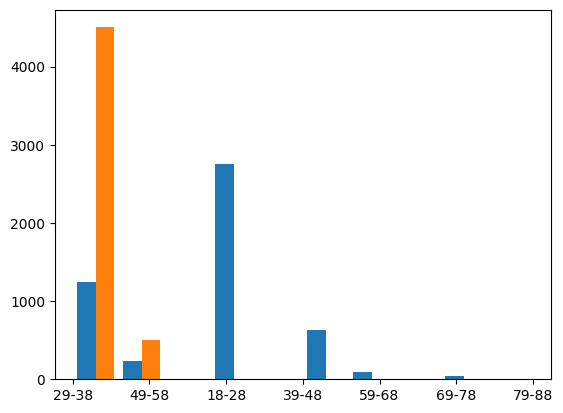

In [ ]:
print(df_age_target2)
histogram = plt.hist(df_age_target2, label='AgeCategory')
print(histogram)

/tmp/ipython-input-2028745039.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


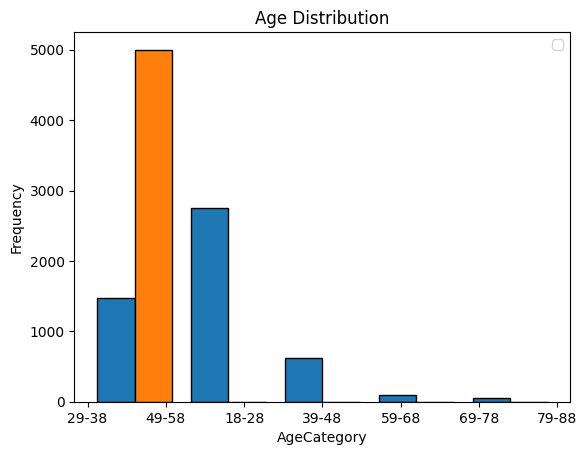

In [ ]:
plt.hist(df_age_target2, bins=5, edgecolor='black')  # 5 bins
plt.title('Age Distribution')

plt.xlabel('AgeCategory')
plt.ylabel('Frequency')
plt.show()